# NLP Basic Assignment
## 과제 : spam.csv를 활용하여 유의미한 해석을 도출해주세요!

In [1]:
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다.
- 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다.

In [2]:
spam = pd.read_csv('spam.csv')

In [3]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [4]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
# Check the shape and missing values in the dataframe
data_info = {
    "Number of rows": spam.shape[0],
    "Number of columns": spam.shape[1],
    "Missing values": spam.isnull().sum().to_dict()
}

data_info

{'Number of rows': 5572,
 'Number of columns': 2,
 'Missing values': {'v1': 0, 'v2': 0}}

## Tokenizing


In [6]:
import nltk

In [7]:
# 예시 코드 코드
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return words

spam['processed_text'] = spam['v2'].apply(preprocess_text)
spam.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pshpu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pshpu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,v1,v2,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t..."


In [8]:
vocab = set(word for sublist in spam['processed_text'] for word in sublist)
vocab_size = len(vocab)

## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram 등이 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [19]:
from gensim.models import Word2Vec

sentences = spam['processed_text'].tolist()

cbow_model = Word2Vec(sentences, vector_size=128, window=7, min_count=1, workers=4, sg=0)

skipgram_model = Word2Vec(sentences, vector_size=128, window=7, min_count=1, workers=4, sg=1)

## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_embeddings(embeddings, words):
    # PCA to reduce dimensionality
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], edgecolors='k', c='blue')

    for word, (x, y) in zip(words, pca_result):
        plt.text(x, y, word)
    plt.show()

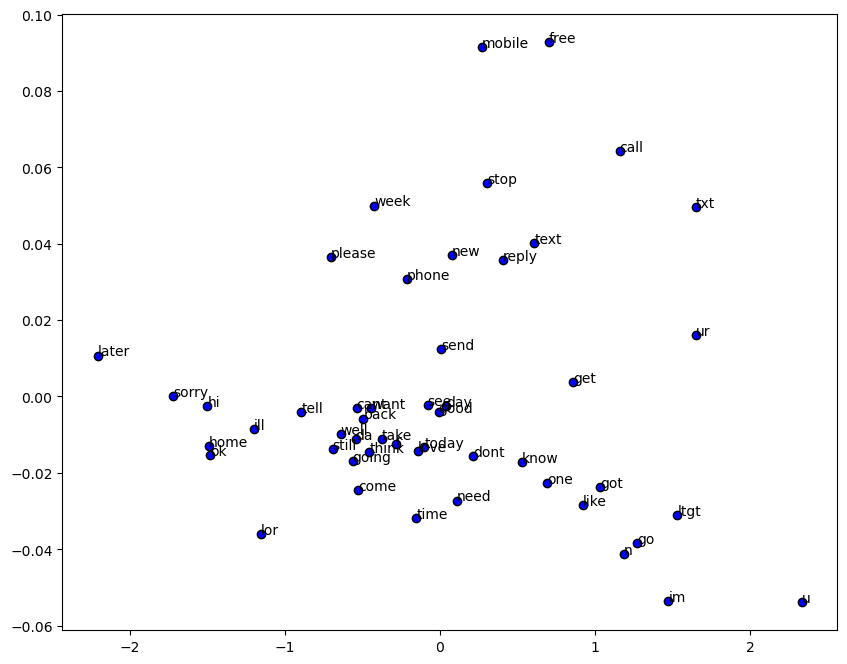

In [21]:
top_words = list(cbow_model.wv.key_to_index.keys())[:50]
embeddings = [cbow_model.wv[word] for word in top_words]

plot_embeddings(embeddings, top_words)

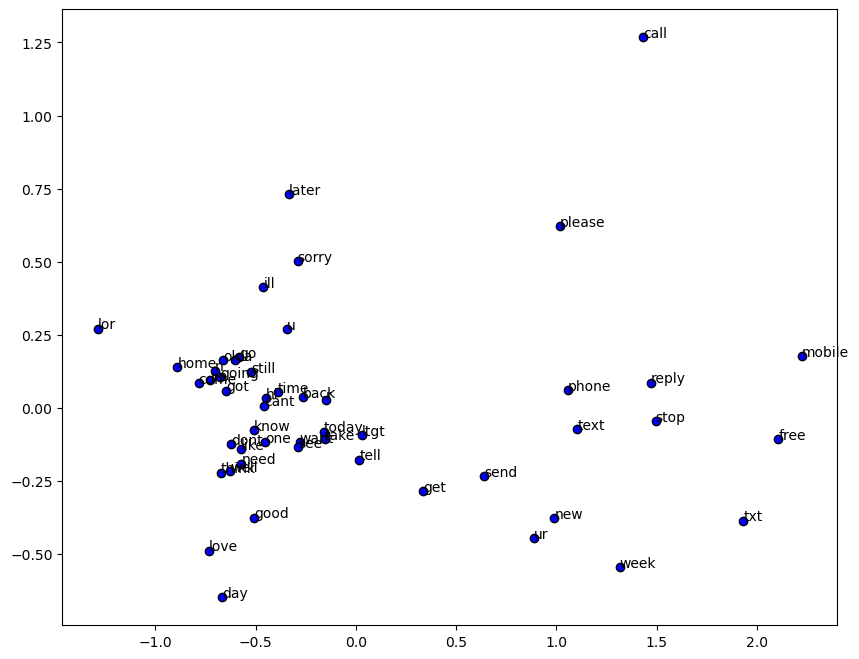

In [22]:
top_words = list(skipgram_model.wv.key_to_index.keys())[:50]
embeddings = [skipgram_model.wv[word] for word in top_words]

plot_embeddings(embeddings, top_words)

In [ ]:
"""
CBOW와 Skip gram을 이용하여 단어를 임베딩한 후 plotting을 진행 시, Skip-gram의 방법론이 비슷한 문맥 또는 비슷한 의미를 가지는
단어들끼리 잘 뭉쳐져있다. 이는 모델의 특성으로 알 수 있다.  Skip-Gram은 중심 단어를 기반으로 주변 단어를 예측한다.
이로 인해 Skip-Gram은 주변 문맥을 잘 포착하며, 특히 희귀 단어나 특정 문맥에서만 등장하는 단어에 대한 정보를 잘 포착할 수 있다.
이 특징 때문에 Skip-Gram은 종종 CBOW보다 더 세밀한 단어 임베딩을 생성하는 경향이 있다.
"""